# Week 1

## 1.2	Case Study: Exploratory Data Analysis on Titanic Data set  

1. Load the titanic dataset.
2. Display first 5 rows and last 5 rows.
3. Display no. of rows and cols in the dataset. 
4. Display the no. of rows where the values in the ‘Age' column are missing 
5. Display the no. of passengers survived. 
6. Display the no. of people dead. 
7. Drop the rows where 'Age' column does not have any value. 
8. Display the names and ages of survived people. 
9. Display dataframe with only numeric datatypes.
10. Draw distribution plot on ‘Age’.
11. Display count plot with the categorical variable: ’survived’ values. Display the males and females survived. Prove that more females are survived than males.
12. Display count plot on survived people in ‘Pclass’.Prove that more first class people are survived than the other classes(2nd and 3rd classes).


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('titanicEDA.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [19]:
# 3. Display no. of rows and cols in the dataset
df.shape

(891, 12)

In [20]:
# 4. Display the no. of rows where the values in the ‘Age' column are missing 
df["Age"].isna().sum()


177

In [21]:
# 5. Display the no. of passengers survived

#  df["Survived"].sum()  ---> Method 1

df["Survived"].value_counts()[1]  # ---> Method 2

342

In [22]:
# 6. Display the no. of people dead. 

df["Survived"].value_counts()[0]

549

In [23]:
# 7. Drop the rows where 'Age' column does not have any value

df.dropna(subset=['Age'],inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [25]:
# 8. Display the names and ages of survived people. 
survived_df = df[df['Survived']==1]

survived_df[["Name","Age"]]



,Name,Age
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0
...,...,...
875,"Najib, Miss. Adele Kiamie ""Jane""",15.0
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0
880,"Shelley, Mrs. William (Imanita Parrish Hall)",25.0
887,"Graham, Miss. Margaret Edith",19.0


In [26]:
# 9. Display dataframe with only numeric datatypes.
numeric_df = df.select_dtypes(['int64','float64'])
numeric_df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

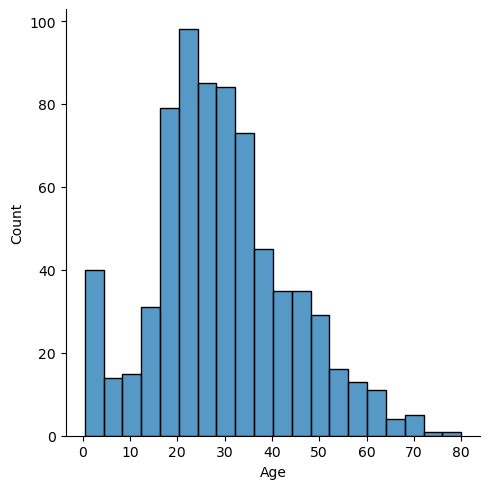

In [27]:
# 10. Draw distribution plot on ‘Age’.
sns.displot(df["Age"])

<AxesSubplot: xlabel='Survived', ylabel='count'>

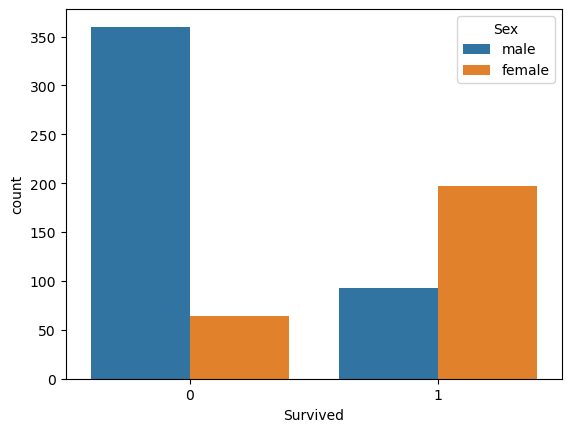

In [28]:
# 11. Display count plot with the categorical variable: ’survived’ values.
# Display the males and females survived. Prove that more females are survived than males.

sns.countplot(x='Survived',hue='Sex',data=df)

<AxesSubplot: xlabel='Survived', ylabel='count'>

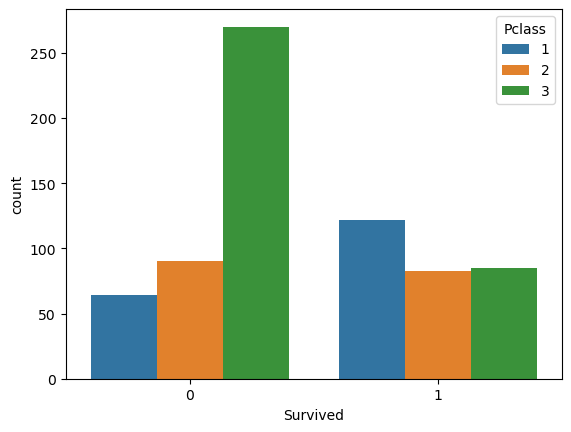

In [29]:
# 12. Display count plot on survived people in ‘Pclass’
# Prove that more first class people are survived than the other classes(2nd and 3rd classes).

sns.countplot(x='Survived',hue='Pclass',data=df)
